In [174]:
from matplotlib.pyplot import plot, scatter

In [175]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [176]:
def get_times1(file_name):
    'For files outputed by prog1.cpp'
    'return the array of avarage times'
    'dimensions = p,N,iter'
    file= open(file_name)
    i = 0
    times = []
    for line in file:
        i += 1
        if i % 2 == 0:
            times.append(float(line.split(" = ")[1]))
    times = np.array(times).reshape((5,5,30))
    times = np.mean(times, axis=(2))
    return times

In [177]:
Ps = [1,2,4,8,16]
Ns = [i*100000 for i in range(1,6)]

In [179]:
Times_mean = get_times1('output15_2_8_7.txt')

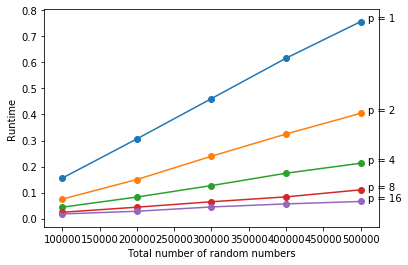

In [180]:
def plot_N(Times_mean):
    'Number of random numbers in the x-axis'
    for i in range(5):
        plot(Ns,Times_mean[i,:])
        scatter(Ns,Times_mean[i,:])
        plt.text(Ns[-1]+10000, Times_mean[i,-1],"p = "+str(2**i))
    plt.xlabel('Total number of random numbers')
    plt.ylabel('Runtime')
plot_N(Times_mean)

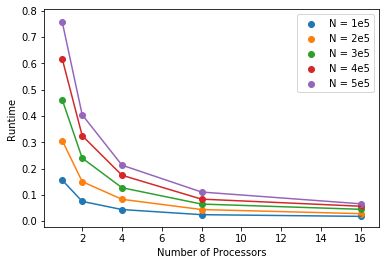

In [181]:
def plot_P(Times_mean):
    'Number of processors in the x-axis'
    for i in range(5):
        plot(Ps,Times_mean[:,i])
        scatter(Ps,Times_mean[:,i], label = "N = "+str(i+1) + 'e5')
    plt.legend()
    plt.xlabel('Number of Processors')
    plt.ylabel('Runtime')
plot_P(Times_mean)

In [182]:
def least_square(Ps, Ns, Times_mean):
    'fit the function T(N,P) = a*(N/P) + b*log(P) + g'
    A = np.ones((25,3))
    b = np.zeros(25)
    k = 0
    for i,p in enumerate(Ps):
        for j,n in enumerate(Ns):
            A[k,0] = n/p
            A[k,1] = math.log(p,2)
            b[k] = Times_mean[i,j]
            k += 1
    a,b,g = np.linalg.lstsq(A,b)[0]
    return a, b, g
least_square(Ps, Ns, Times_mean)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if sys.path[0] == '':


(1.5369039393574302e-06, 0.0030847585730775008, 0.002085670570581887)

In [183]:
# calculate p_min which minimizes T(n,p) for a fixed n
n = 100000
p_min = a*n/b
p_min

6.010991427401448

In [184]:
def get_times2(file_name):
    'For files outputed by prog2.cpp'
    'return the array of avarage times'
    'dimensions = p,N,iter' 
    file= open(file_name)
    i = 0
    local_times = []
    parallel_times = []
    for line in file:
        i += 1
        if i % 2 == 0:
            local_times.append(float(line.split(", ")[0]))
            parallel_times.append(float(line.split(", ")[1]))
    local_times = np.array(local_times).reshape((5,5,30))
    parallel_times = np.array(parallel_times).reshape((5,5,30))
    local_times = np.mean(local_times, axis=(2))
    parallel_times = np.mean(parallel_times, axis=(2))
    return local_times, parallel_times

In [185]:
local_times, parallel_times = get_times2('output15_2_8_local_parallel.txt')

In [186]:
def cal_coef(Ps, Ns, local_times, parallel_times):
    'To calculate the alphas and betas using local_times and parallel_times'
    a = np.zeros(20)
    b = np.zeros(20)
    k = 0
    for i,p in enumerate(Ps[1:]):
        for j,n in enumerate(Ns):
            a[k] = local_times[i+1,j]/(n/p)
            b[k] = parallel_times[i+1,j]/math.log(p,2)
            k += 1
    return a,b

In [187]:
a, b = cal_coef(Ps, Ns, local_times, parallel_times)

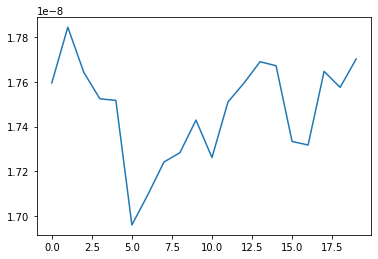

In [188]:
plot(a)

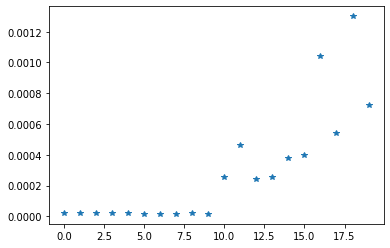

In [189]:
plot(b,'*')

In [190]:
# calculate the avarage values for alpha and beta
a = np.mean(a)
b = np.mean(b)
a,b

(1.7472207222222223e-08, 0.0002906709722222222)